In [ ]:

import warnings
warnings.filterwarnings('ignore')


In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import scipy.stats as stats

In [ ]:
df = pd.read_csv('house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df['date'] = pd.to_datetime(df['date'])

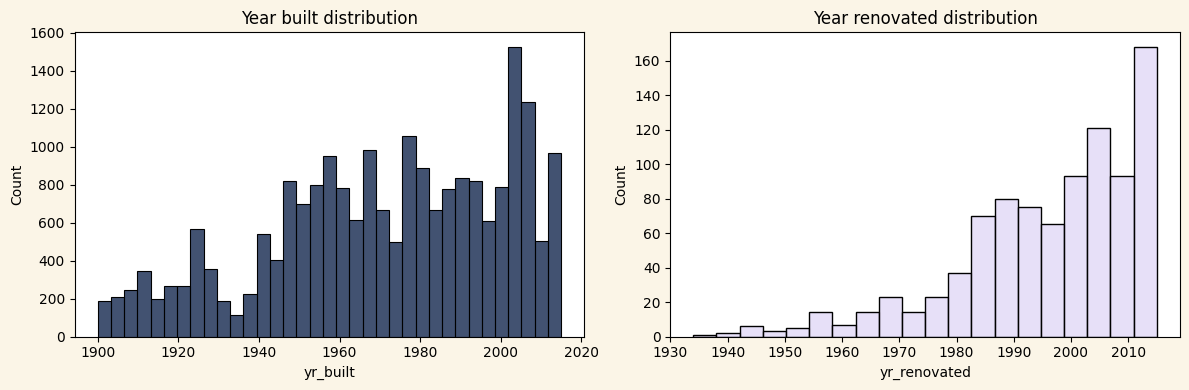

In [ ]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Year built distribution')
sns.histplot(df['yr_built'], color='#021841ff')

plt.subplot(1, 2, 2)
plt.title('Year renovated distribution')
df_test = df[df.yr_renovated > 0]
sns.histplot(df_test['yr_renovated'], color='#e0d6f6ff')

plt.tight_layout()
plt.show()

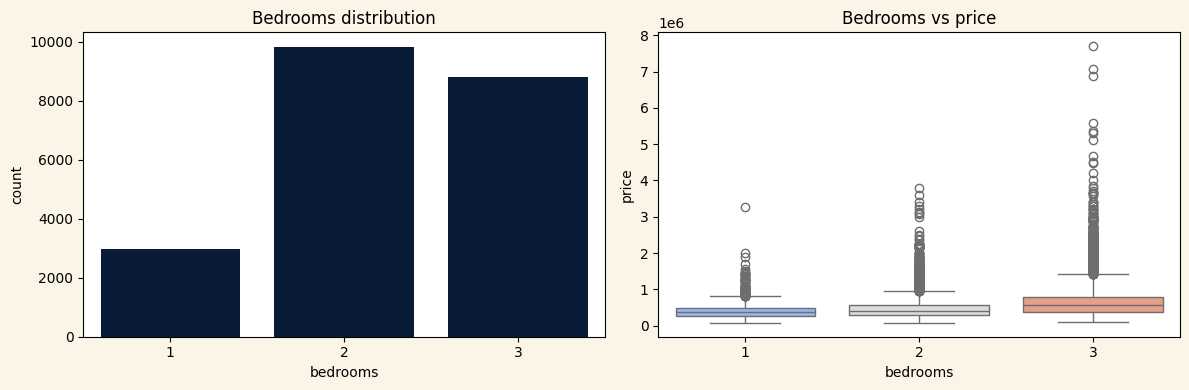

In [ ]:
_list = list()
for value in df.bedrooms:
    if value <= 2:
        _list.append(1)
    elif value >= 4:
        _list.append(3)
    else:
        _list.append(2)

df['bedrooms'] = _list


fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Bedrooms distribution')
sns.countplot(x='bedrooms', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Bedrooms vs price')
n_colors = len(df['bedrooms'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='bedrooms', y='price', data=df, palette=palette)

plt.tight_layout()
plt.show()

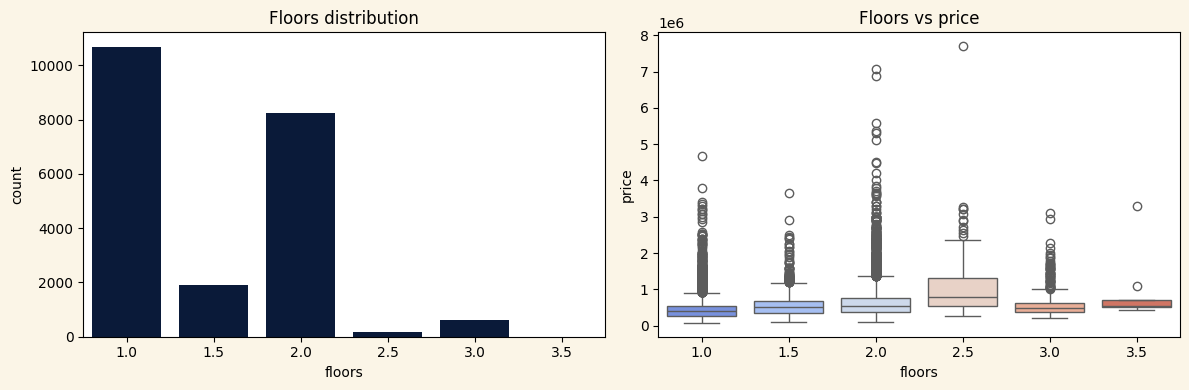

In [ ]:
fig = plt.figure(figsize = (12, 4), facecolor = '#fbf5e7')

plt.subplot(1, 2, 1)
plt.title('Floors distribution')
sns.countplot(x='floors', data=df, color = '#021841ff')

plt.subplot(1, 2, 2)
plt.title('Floors vs price')
n_colors = len(df['floors'].unique())
palette = sns.color_palette("coolwarm", n_colors=n_colors)
sns.boxplot(x='floors', y='price', data=df, palette=palette)

plt.tight_layout()
plt.show()

In [ ]:
#Distribution of view feature vs price
import plotly.express as px
fig=px.line(x=df.groupby('view')['price'].mean().index,
            y=df.groupby('view')['price'].mean(),
            title='Distribution between price and view',
               )
fig.update_layout(xaxis_title='view',
           yaxis_title='price')

In [ ]:
def dataframe_info(df):
    print("dataframe shape is :", df.shape)
    columns_x = df.copy()
    tmp = []

    for col in columns_x:
        ser = df[col]
        tmp.append({
            'name': ser.name,
            'dtype': str(ser.dtype),
            'n_unique': len(ser.unique()),
            'n_null': ser.isnull().sum(),
        })
    df_info = pd.DataFrame(tmp)
    display(df_info)

In [ ]:
 # Drop duplicates in place
df.drop_duplicates(keep='first', inplace=True)

In [ ]:

num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.columns[df.dtypes == 'object']

#Numerical Columns

In [ ]:

display(df[num_cols].head(2))
display(df[num_cols].shape)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,2,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


(21613, 20)

In [ ]:

dataframe_info(df[num_cols])

dataframe shape is : (21613, 20)


,name,dtype,n_unique,n_null
0,id,int64,21436,0
1,price,float64,4028,0
2,bedrooms,int64,3,0
3,bathrooms,float64,30,0
4,sqft_living,int64,1038,0
5,sqft_lot,int64,9782,0
6,floors,float64,6,0
7,waterfront,int64,2,0
8,view,int64,5,0
9,condition,int64,5,0


In [ ]:
for row in df[num_cols].columns:
  display(print(f'(column name : {row} and unique values is :',df[num_cols][row].unique()))

(column name : id and unique values is : [7129300520 6414100192 5631500400 ... 1523300141  291310100 1523300157]


None

(column name : price and unique values is : [ 221900.  538000.  180000. ...  610685. 1007500.  402101.]


None

(column name : bedrooms and unique values is : [2 1 3]


None

(column name : bathrooms and unique values is : [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]


None

(column name : sqft_living and unique values is : [1180 2570  770 ... 3087 3118 1425]


None

(column name : sqft_lot and unique values is : [ 5650  7242 10000 ...  5813  2388  1076]


None

(column name : floors and unique values is : [1.  2.  1.5 3.  2.5 3.5]


None

(column name : waterfront and unique values is : [0 1]


None

(column name : view and unique values is : [0 3 4 2 1]


None

(column name : condition and unique values is : [3 5 4 1 2]


None

(column name : grade and unique values is : [ 7  6  8 11  9  5 10 12  4  3 13  1]


None

(column name : sqft_above and unique values is : [1180 2170  770 1050 1680 3890 1715 1060 1890 1860  860 1430 1370 1810
 1980 1600 1200 1250 2330 2270 1070 2450 1710 1750 1400  790 2570 2320
 1190 1510 1090 1280  930 2360  890 2620 2600 3595 1570  920 3160  990
 2290 2165 1640 1000 2130 2830 2250 2420 3250 1850 1590 1260 2519 1540
 1110 1770 2720 2240 3070 2380 2390  880 1040  910 3450 2350 1900 1010
  960 2660 1610  765 3520 1290 1960 1160 1210 1270 1440 2190 2920 1460
 1170 1240 3140 2030 2310  700 1080 2520 2780 1560 1450 1720 2910 1620
 1360 2070 2460 1390 2140 1320 1340 1550  940 1380 3670 2370 1130  980
 3540 2500 1760 1030 1780 3400 2680 1670 2590  820 1220 2440 2090 1100
 1330 1420 1690 2150 1910 1350 1940  900 1630 2714  850 1870 1950 2760
 2020 1120 1480 1230 2280 3760 3530  830 1300 2740 1830  720 2010 3360
  800 1730  760 1700 4750 5310  580 2653 2850 2210 2630 3500 1740 1140
 2160 2650  970 2040 2180 2220 1660 3370 2690 1930 3150 3030 2050 2490
 2560 1275 2580  560 1820 18

None

(column name : sqft_basement and unique values is : [   0  400  910 1530  730 1700  300  970  760  720  700  820  780  790
  330 1620  360  588 1510  410  990  600  560  550 1000 1600  500 1040
  880 1010  240  265  290  800  540  380  710  840  770  480  570 1490
  620 1250 1270  120  650  180 1130  450 1640 1460 1020 1030  750  640
 1070  490 1310  630 2000  390  430  850  210 1430 1950  440  220 1160
  860  580 2060 1820 1180  200 1150 1200  680  530 1450 1170 1080  960
 1100  280  870  460 1400 1320  660 1220  900  420 1580 1380  475  690
  270  350  935 1370  980 1470  160  950   50  740 1780 1900  340  470
  370  140 1760  130  610  520  890 1110  150 1720  810  190 1290  670
 1800 1120 1810   60 1050  940  310  930 1390 1830 1300  510 1330 1590
  920 1420 1240 1960 1560 2020 1190 2110 1280  250 2390 1230  170  830
 1260 1410 1340  590 1500 1140  260  100  320 1480 1060 1284 1670 1350
 2570 2590 1090  110 2500   90 1940 1550 2350 2490 1481 1360 1135 1520
 1850 1660 2130 2600 1690

None

(column name : yr_built and unique values is : [1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]


None

(column name : yr_renovated and unique values is : [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]


None

(column name : zipcode and unique values is : [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 98032
 98045 98102 98077 98108 98168 98177 98065 98029 98006 98109 98022 98033
 98155 98024 98011 98031 98106 98072 98188 98014 98055 98039]


None

(column name : lat and unique values is : [47.5112 47.721  47.7379 ... 47.3906 47.3339 47.6502]


None

(column name : long and unique values is : [-122.257 -122.319 -122.233 -122.393 -122.045 -122.005 -122.327 -122.315
 -122.337 -122.031 -122.145 -122.292 -122.229 -122.394 -122.375 -121.962
 -122.343 -122.21  -122.306 -122.341 -122.169 -122.166 -122.172 -122.218
 -122.36  -122.314 -122.304 -122.11  -122.07  -122.357 -122.368 -122.157
 -122.31  -122.132 -122.362 -122.282 -122.18  -122.027 -122.347 -122.016
 -122.364 -122.175 -121.977 -122.371 -122.151 -122.301 -122.451 -122.322
 -122.189 -122.384 -122.369 -122.281 -122.29  -122.114 -122.122 -122.116
 -122.149 -122.339 -122.335 -122.344 -122.32  -122.297 -122.192 -122.215
 -122.16  -122.179 -122.287 -122.036 -122.073 -121.987 -122.125 -122.34
 -122.025 -122.008 -122.291 -122.365 -122.199 -122.194 -122.387 -122.372
 -122.391 -122.351 -122.386 -122.249 -122.277 -122.378 -121.958 -121.714
 -122.08  -122.196 -122.184 -122.133 -122.38  -122.082 -122.109 -122.053
 -122.349 -122.295 -122.253 -122.248 -122.303 -122.294 -122.226 -122.266
 -122.098

None

(column name : sqft_living15 and unique values is : [1340 1690 2720 1360 1800 4760 2238 1650 1780 2390 2210 1330 1370 2140
 1890 1610 1060 1280 1400 4110 2240 1220 2200 1030 1760 1860 1520 2630
 2580 1390 1460 1570 2020 1590 2160 1730 1290 2620 2470 2410 3625 1580
 3050 1228 2680  970 1190 1990 1410 1480 2730 1950 2250 2690 2960 2270
 2570 2500 1440 2750 2221 1010 3390 3530 1640 1510 2420 1940 3240 1680
  890 1130 3350 2350 1870 1720 1850 1900 1980 2520 1350 1750 1160 2550
 2370 1240 1270 2990 1380 1540 2090 2640 1830 1620 1880 2340 1710 2700
 3060 2660 1700 1970 1420 2060 2480 1550 1170 2820 1560 2230 2840 1450
 1500 3160 1200 3400 2110 2920 1770 1070 1930 3740 2260 1670 2290 1050
 2540 2190 2030 1230 2330 1300 1430 2770 1250 1630 2590 2130 1100 3836
 1320 2120 3070 1910 2080 1960 2280 1150 3430 2070 2600  830 1260 3120
 2010 1660 1600 2380 3890 4180 2653 2670 3920 2300 2310 2320 3150 1740
 2400 4550 2510 2440 2880 3860 2150 1310 1820 3080  880 2560 3470 1020
 2040 2610 1810 2860 3480

None

(column name : sqft_lot15 and unique values is : [5650 7639 8062 ... 5731 1509 2007]


None

#check nan values

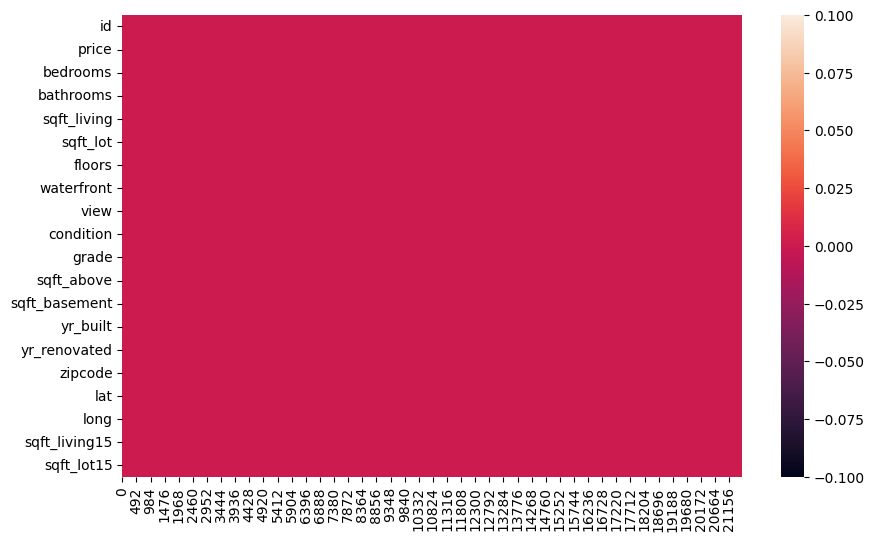

In [ ]:

#nan_values oh numerical cols
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].isna().transpose());

#describe


In [ ]:
df_numerical=df[num_cols].copy()
df_numerical.describe().style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4580301520.864988,540088.141767,2.270439,2.114757,2079.899736,15106.967566,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2876565571.312049,367127.196483,0.687272,0.770163,918.440897,41420.511515,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1000102.000000,75000.000000,1.000000,0.000000,290.000000,520.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2123049194.000000,321950.000000,2.000000,1.750000,1427.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3904930410.000000,450000.000000,2.000000,2.250000,1910.000000,7618.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7308900445.000000,645000.000000,3.000000,2.500000,2550.000000,10688.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9900000190.000000,7700000.000000,3.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


check correlation multicollenarity between features

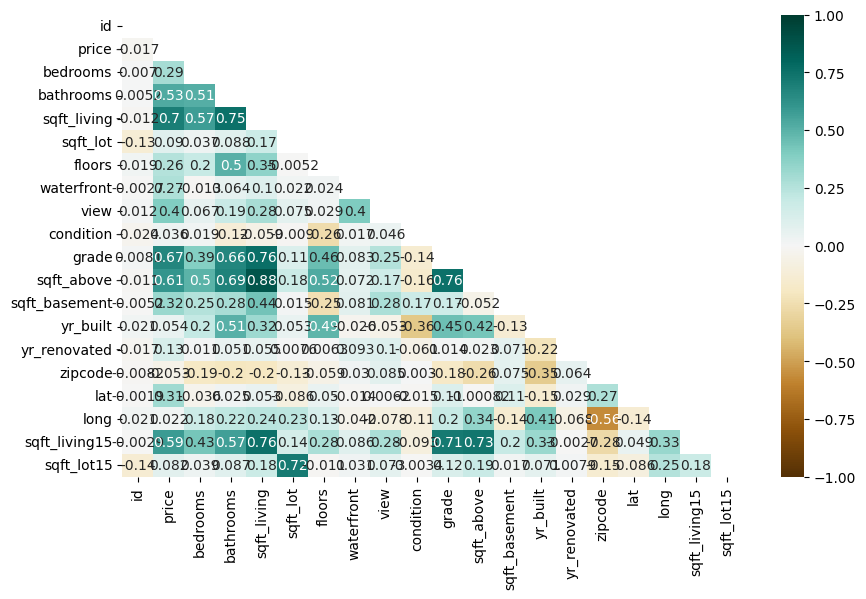

In [ ]:

corr_matrix = df_numerical.corr(method='pearson') #method='pearson'for linearity ,we can use also Spearman's Rank Correlation Coefficient
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))
# Plot heatmap
heatmap = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
# Show the plot
plt.show()

check correlation between target values and features

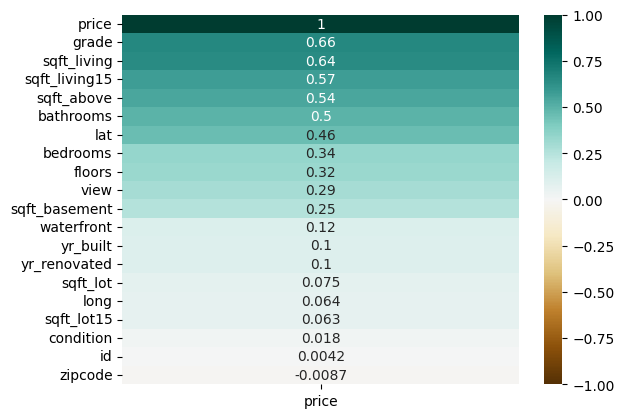

In [ ]:
heatmap = sns.heatmap(df_numerical.corr(method='spearman')[['price']].sort_values(by='price',
                                                                                          ascending=False),
                                                                                           vmin=-1, vmax=1, annot=True, cmap='BrBG')


select top features based on correlation matrix

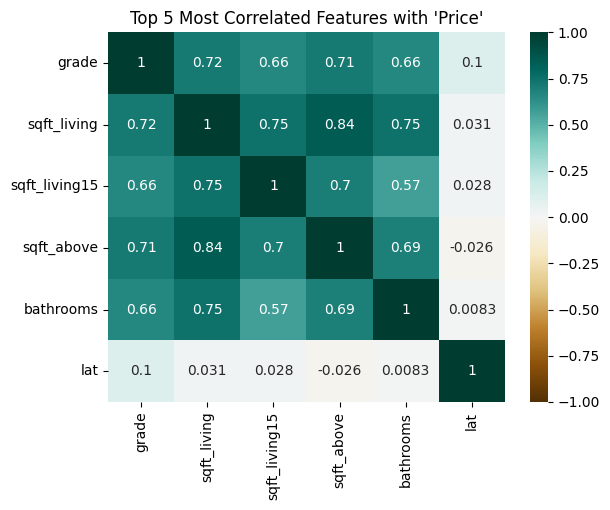

In [ ]:
# Compute the correlation matrix for all features with 'price'
correlation_with_price = df_numerical.corr(method='spearman')[['price']]

# Sort the correlations by absolute value (highest correlation first) and select the top 5
top_features = correlation_with_price.abs().sort_values(by='price', ascending=False).head(7)  # Include 'price' itself

# Drop 'price' if it appears in the top 5 (self-correlation)
top_5_features = top_features[top_features.index != 'price']

# Generate the heatmap for the top 5 most correlated features
heatmap = sns.heatmap(df_numerical[top_5_features.index].corr(method='spearman'),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')

plt.title("Top 5 Most Correlated Features with 'Price'")
plt.show()


In [ ]:
top_features

,price
price,1.000000
grade,0.658215
sqft_living,0.644191
sqft_living15,0.572290
sqft_above,0.541752
bathrooms,0.497160
lat,0.456409


In [ ]:
top_features.index.tolist()

['price',
 'grade',
 'sqft_living',
 'sqft_living15',
 'sqft_above',
 'bathrooms',
 'lat']

In [ ]:
df_numerica=df[top_features.index.tolist()]
df_numerica.tail(2)

,price,grade,sqft_living,sqft_living15,sqft_above,bathrooms,lat
21611,400000.0,8,1600,1410,1600,2.50,47.5345
21612,325000.0,7,1020,1020,1020,0.75,47.5941


#price - target value

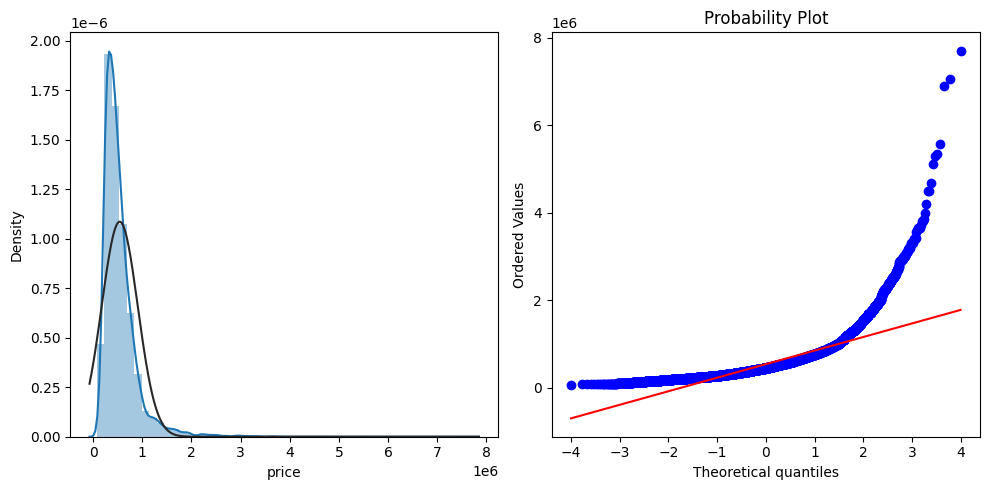

mu: 540088.142, sigma: 367118.703


In [ ]:
from scipy.stats import norm, skew
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
y=df['price']
sns.distplot(y, fit = norm, ax = ax[0])
stats.probplot(y, plot = plt)

plt.tight_layout()
plt.show()

mu, sigma = norm.fit(y)
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))

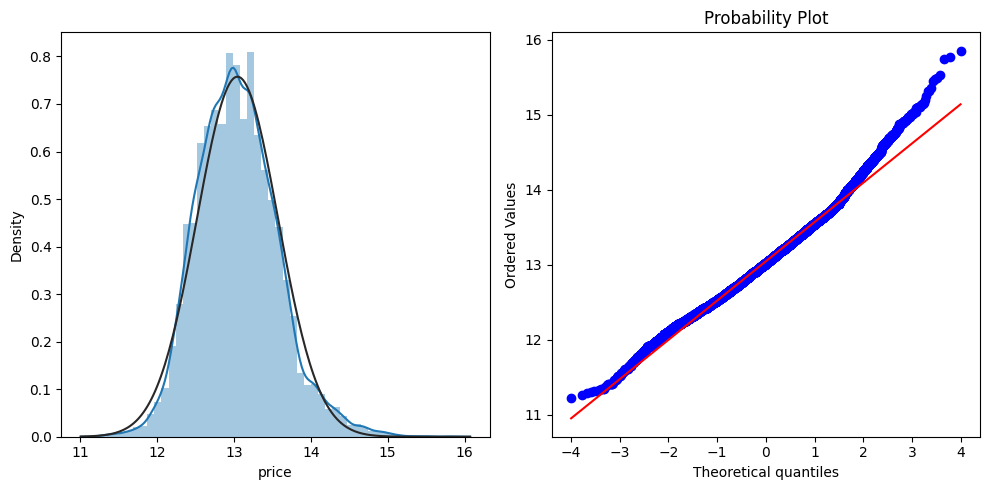

mu: 13.048, sigma: 0.527


In [ ]:

# apply log-transformation

y= np.log1p(y)

fig, ax = plt.subplots(1, 2, figsize = (10, 5))

sns.distplot(y, fit = norm, ax = ax[0])
stats.probplot(y, plot = plt)

plt.tight_layout()
plt.show()

mu, sigma = norm.fit(y)
print("mu: {:.3f}, sigma: {:.3f}".format(mu, sigma))


#training

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_numerica,y,
                                                    test_size=0.2,
                                                    random_state=42)
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_val.shape)
print('Testing Labels Shape:', y_val.shape)

Training Features Shape: (17290, 7)
Training Labels Shape: (17290,)
Testing Features Shape: (4323, 7)
Testing Labels Shape: (4323,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Assuming X_train, X_val, y_train, and y_val are already defined

# Step 1: Fit and transform X_train, transform X_val
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Import Linear Regression and train the model
model = SGDRegressor()
model.fit(X_train_scaled, y_train)

# Step 3: Predict on X_val
y_val_pred = model.predict(X_val_scaled)

# Step 4: Evaluate the model
r2 = r2_score(y_val, y_val_pred)
print("R² Score on validation set:", r2)


R² Score on validation set: 0.8596604101559374


In [ ]:

# Step 3: Predict on X_val
y_train_pred = model.predict(X_train_scaled)

# Step 4: Evaluate the model
r2 = r2_score(y_train, y_train_pred)
print("R² Score on training set:", r2)

R² Score on training set: 0.8677073953610192


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


([], [])

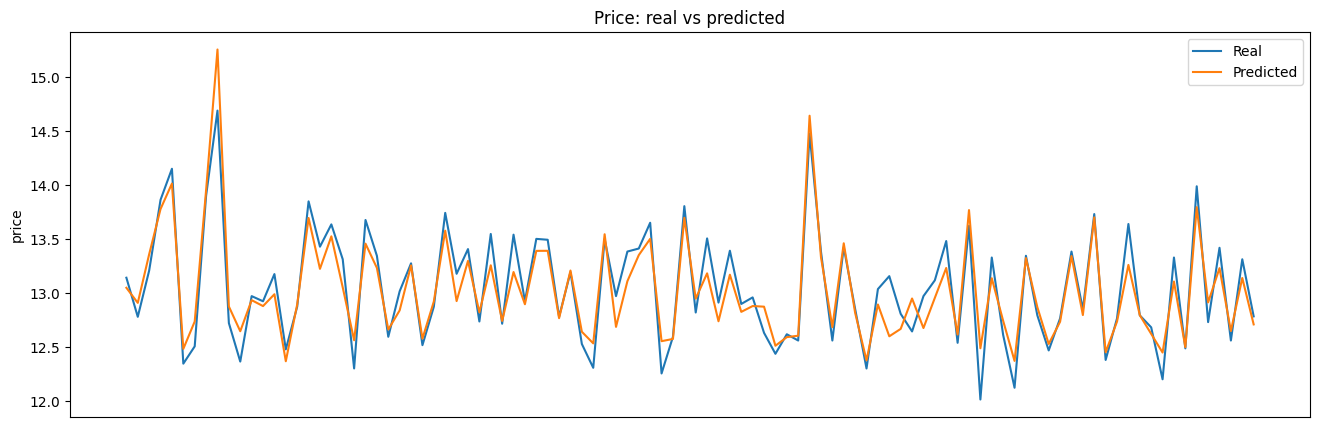

In [ ]:
A = np.array(y_val).reshape(-1, 1)
B = y_val_pred.reshape(-1, 1)
print(type(y_val_pred))
print(type(y_val))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())

Scratch

R^2 Score on Test Set: 0.8602138500587102


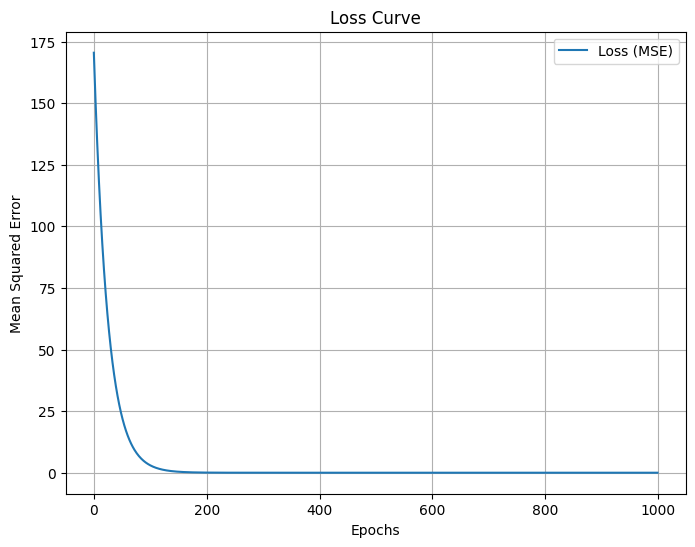

In [ ]:
class LinearRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.loss_history = []

    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.epochs):
            # Predictions
            y_pred = np.dot(X, self.weights) + self.bias

            # Calculate gradients
            dw = -(2 / n_samples) * np.dot(X.T, (y - y_pred))
            db = -(2 / n_samples) * np.sum(y - y_pred)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate loss (MSE) and store it
            mse = np.mean((y - y_pred) ** 2)
            self.loss_history.append(mse)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def plot_loss(self):
        plt.figure(figsize=(8, 6))
        plt.plot(self.loss_history, label='Loss (MSE)')
        plt.xlabel('Epochs')
        plt.ylabel('Mean Squared Error')
        plt.title('Loss Curve')
        plt.legend()
        plt.grid()
        plt.show()

# Usage
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are preprocessed and ready
model = LinearRegressionFromScratch(learning_rate=0.01, epochs=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_test = model.predict(X_val_scaled)

# Calculate R^2 Score
r2 = r2_score(y_val, y_pred_test)
print("R^2 Score on Test Set:", r2)

# Plot Loss Curve
model.plot_loss()


For further analysis, it is necessary to evaluate feature engineering, check for outlier detection, and, based on the data, potentially create better visualizations.